📤 Upload your .tflite model:


Saving model_unquant.tflite to model_unquant.tflite
📤 Upload your labels.txt:


Saving labels.txt to labels.txt
✅ Labels: ['0 Phone', '1 Bottle', '2 Paper', '3 Empty']
📤 Upload an image to classify:


Saving WIN_20250419_10_33_06_Pro.jpg to WIN_20250419_10_33_06_Pro.jpg


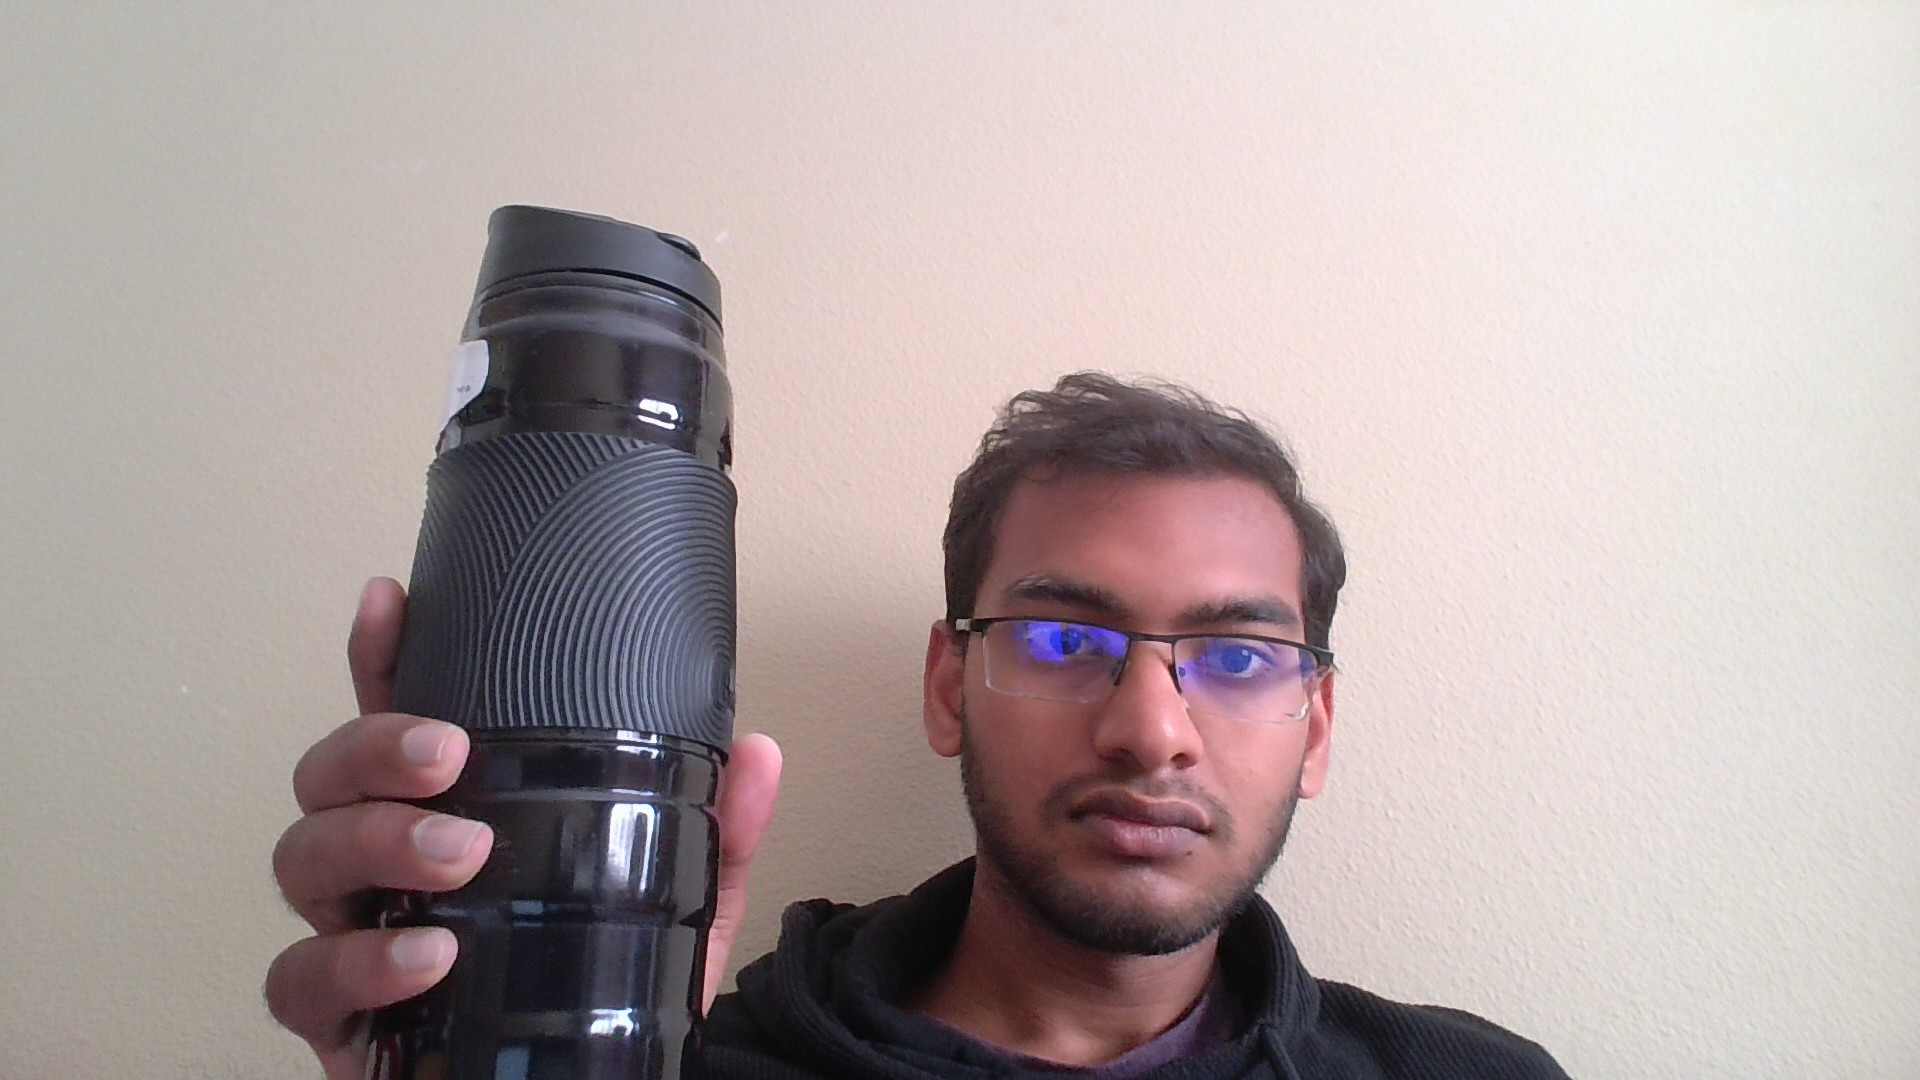

🔍 Prediction: 1 Bottle (63.20%)


In [ ]:
# STEP 1: Install dependencies
!pip install -q tensorflow opencv-python
import numpy as np
import tensorflow as tf
import cv2
from google.colab import files
from IPython.display import Image, display

# STEP 2: Upload TFLite model + labels
print("📤 Upload your .tflite model:")
model_file = files.upload()
tflite_model_path = next(iter(model_file))

print("📤 Upload your labels.txt:")
labels_file = files.upload()
labels_path = next(iter(labels_file))

# STEP 3: Load labels
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()
print("✅ Labels:", labels)

# STEP 4: Upload image for classification
print("📤 Upload an image to classify:")
test_img = files.upload()
img_path = next(iter(test_img))
display(Image(img_path))

# STEP 5: Preprocess image
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # TFLite TM models use 224x224 input
img = img.astype(np.float32) / 255.0
input_tensor = np.expand_dims(img, axis=0)

# STEP 6: Run inference using TFLite
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], input_tensor)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# STEP 7: Get Prediction
predicted_index = np.argmax(output_data)
confidence = output_data[0][predicted_index]
print(f"🔍 Prediction: {labels[predicted_index]} ({confidence:.2%})")

In [ ]:
# STEP 1: Install required packages
!pip install -q tensorflow pydub scipy

import numpy as np
import tensorflow as tf
import scipy.io.wavfile as wav
import os
from google.colab import files

# STEP 2: Upload model + labels
print("📤 Upload your .tflite model:")
model_file = files.upload()
tflite_model_path = next(iter(model_file))

print("📤 Upload your labels.txt:")
labels_file = files.upload()
labels_path = next(iter(labels_file))

# STEP 3: Upload audio clip (must be 16kHz, 1-sec)
print("📤 Upload your 1-second mono .wav file (16kHz):")
audio_file = files.upload()
audio_path = next(iter(audio_file))

# STEP 4: Load labels
with open(labels_path, 'r') as f:
    labels = f.read().splitlines()
print("✅ Labels:", labels)

# STEP 5: Load and preprocess audio
rate, data = wav.read(audio_path)

# Ensure it's mono
if len(data.shape) == 2:
    data = data[:, 0]

data = data.astype(np.float32) / 32768.0  # Normalize

# Match required length (44032)
required_len = 44032
if len(data) > required_len:
    data = data[:required_len]
elif len(data) < required_len:
    data = np.pad(data, (0, required_len - len(data)))

# Reshape input
input_data = np.expand_dims(data, axis=0).astype(np.float32)


# STEP 6: Load TFLite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_data = np.expand_dims(data, axis=0)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# STEP 7: Output prediction
output = interpreter.get_tensor(output_details[0]['index'])
predicted_index = np.argmax(output)
confidence = output[0][predicted_index]
print(f"🔊 Prediction: {labels[predicted_index]} ({confidence:.2%})")


📤 Upload your .tflite model:


Saving soundclassifier_with_metadata.tflite to soundclassifier_with_metadata (1).tflite
📤 Upload your labels.txt:


Saving labels.txt to labels (2).txt
📤 Upload your 1-second mono .wav file (16kHz):


Saving file.wav to file (1).wav
✅ Labels: ['0 Background Noise', '1 Keyboard typing', '2 Silence']
🔊 Prediction: 0 Background Noise (56.83%)
